# 📊 Anomaly Detection using Classical ML Models
**Author:** Mohammad Zedan  
**Date:** 03.09.2025 — 16:00  
**Version:** V0.1  

This notebook demonstrates how to generate synthetic sinusoidal data with injected anomalies, and apply two classical anomaly detection algorithms — Isolation Forest and One-Class SVM. We evaluate their performance using common metrics and visualize the detected anomalies.

## 📁 1. Generate Clean Sinusoidal Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score, precision_score, recall_score

# For reproducibility
np.random.seed(42)

# Generate sinusoidal data
n_points = 500
x = np.arange(n_points)
y = np.sin(2 * np.pi * x / 50)

# Inject anomalies: add noise to 6% of the points
n_anomalies = int(0.06 * n_points)
anomaly_indices = np.random.choice(n_points, n_anomalies, replace=False)
y_anomalous = y.copy()
y_anomalous[anomaly_indices] += np.random.normal(0, 1, n_anomalies)

# Create labels
labels = np.zeros(n_points)
labels[anomaly_indices] = 1

# Wrap in a DataFrame
df = pd.DataFrame({'x': x, 'value': y_anomalous, 'label': labels})
df.head()

,x,value,label
0,0,0.000000,0.0
1,1,0.125333,0.0
2,2,0.248690,0.0
3,3,0.368125,0.0
4,4,0.481754,0.0


## ⚙️ 2. Apply Isolation Forest & OCSVM

In [2]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
df['scaled'] = scaler.fit_transform(df[['value']])

# Fit Isolation Forest
iso_model = IsolationForest(contamination=0.06, random_state=42)
df['anomaly_iso'] = iso_model.fit_predict(df[['scaled']])
df['anomaly_iso'] = df['anomaly_iso'].map({1: 0, -1: 1})

# Fit OCSVM
ocsvm_model = OneClassSVM(nu=0.06, kernel='rbf', gamma='scale')
df['anomaly_ocsvm'] = ocsvm_model.fit_predict(df[['scaled']])
df['anomaly_ocsvm'] = df['anomaly_ocsvm'].map({1: 0, -1: 1})

## 📈 3. Visualize Detected Anomalies

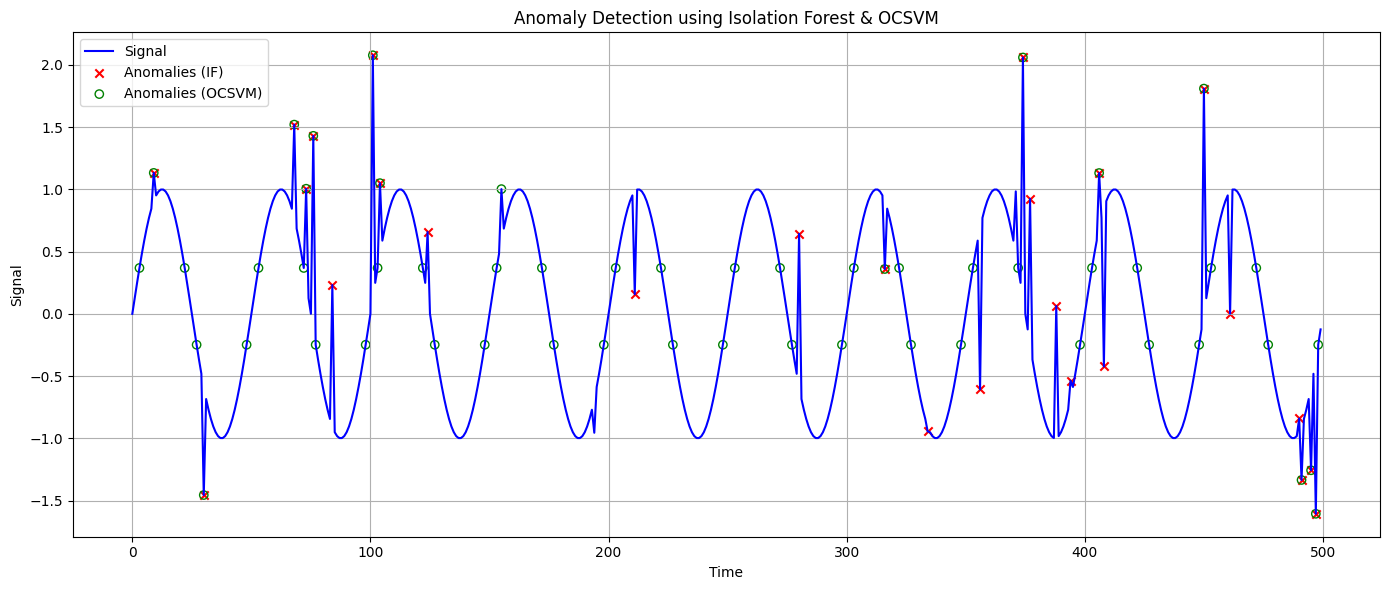

In [3]:
plt.figure(figsize=(14, 6))

plt.plot(df['x'], df['value'], label='Signal', color='blue')
plt.scatter(df.loc[df['anomaly_iso'] == 1, 'x'], df.loc[df['anomaly_iso'] == 1, 'value'],
            color='red', label='Anomalies (IF)', marker='x')
plt.scatter(df.loc[df['anomaly_ocsvm'] == 1, 'x'], df.loc[df['anomaly_ocsvm'] == 1, 'value'],
            color='green', label='Anomalies (OCSVM)', marker='o', facecolors='none', edgecolors='green')

plt.title('Anomaly Detection using Isolation Forest & OCSVM')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🧮 4. Evaluate with Metrics

In [6]:
# Evaluate Isolation Forest
f1_iso = f1_score(df['label'], df['anomaly_iso'])
prec_iso = precision_score(df['label'], df['anomaly_iso'])
recall_iso = recall_score(df['label'], df['anomaly_iso'])

# Evaluate OCSVM
f1_ocsvm = f1_score(df['label'], df['anomaly_ocsvm'])
prec_ocsvm = precision_score(df['label'], df['anomaly_ocsvm'])
recall_ocsvm = recall_score(df['label'], df['anomaly_ocsvm'])

# Print results
print(f"🔍 Isolation Forest: F1 Score: {f1_iso:.3f} Precision: {prec_iso:.3f} Recall: {recall_iso:.3f}\n")
print(f"🔎 OCSVM: F1 Score: {f1_ocsvm:.3f} Precision: {prec_ocsvm:.3f}  Recall: {recall_ocsvm:.3f}")

🔍 Isolation Forest: F1 Score: 0.929 Precision: 1.000 Recall: 0.867

🔎 OCSVM: F1 Score: 0.357 Precision: 0.278  Recall: 0.500
